### Gather Data - Libraries and input files

In [146]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [207]:
#Read File containing survey data
df = pd.read_csv('./survey_results_public.csv', index_col='Respondent')
df.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Assess - Let's Get A Sense of What the Data Looks Like

##### From this section, we notice that there are 51,392 respondents to the 153 questions asked. 

In [148]:
print(df.shape, df.columns)

(51392, 153) Index(['Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize', 'CompanyType',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=153)


In [208]:
#Columns with no null values
no_nulls = set(df.columns[df.isnull().mean()==0])

no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'University'}

#### Only 6 out of 153 columns columns have no null values  

In [150]:
# Over 50% null values
more_than_half_missing_cols = len(set(df.columns[df.isnull().mean() > 0.50]))
more_than_half_missing_cols


53

#### We see that 53 questions have missing values in more than half of their rows.

In [209]:
#More than 80% null values
most_missing_cols = set(df.columns[df.isnull().mean() > 0.80])
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'YearsCodedJobPast'}

#### We see that 13 questions have missing values in more than 80% of their rows. They are good candidates for dropping

In [210]:
least_missing_cols = set(df.columns[df.isnull().mean() < 0.20])
least_missing_cols

{'CareerSatisfaction',
 'ClickyKeys',
 'Country',
 'EmploymentStatus',
 'FormalEducation',
 'HomeRemote',
 'MajorUndergrad',
 'Professional',
 'ProgramHobby',
 'PronounceGIF',
 'University',
 'YearsProgram'}

#### We see that 12 questions have missing values in less than 20% of their rows.

## Clean, Analyze and Visualize (We'll be using bar charts to visualize data)
### Questions

#### 1. What are the 5 most represented countries and Majors? 

In [211]:
countries = len(set(df.Country))

countries

201

#### There are 201 countries represented in the dataset. Every respondent answered this question

In [236]:
country_count = pd.value_counts(df['Country'].values, sort=True)

country_count

United States     11455
India              5197
United Kingdom     4395
Germany            4143
Canada             2233
                  ...  
Macau                 1
Gibraltar             1
Seychelles            1
Turkmenistan          1
Montserrat            1
Length: 201, dtype: int64

#### We see the top countries are United States, India, United Kingdom, Germany and Canada

In [213]:
major_undergrad_count = pd.value_counts(df['MajorUndergrad'].values, sort=True)
major_undergrad_count

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

#### We see the top majors are Computer science or software engineering and Computer engineering or electrical/electronics engineering

In [237]:
## Select top 5 countries for further questions
selected_countries = ['United States', 'India', 'United Kingdom', 'Germany', 'Canada']

In [156]:
selected_countries_df = df[df['Country'].map(lambda x: x in selected_countries)].reset_index()

In [157]:
selected_countries_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN


#### We confirm that we have only 5 countries in our dataframe

In [158]:
len(selected_countries_df)/len(df)

0.5336044520547946

#### Notice that the top 5 countries account for 53% of the responses

In [159]:
## create a function to tabulate results by countries for analysis and plotting

""" Object to return value counts of top 5 countries."""

sumByCountry = {'United States': selected_countries_df.Country.value_counts()['United States'],
              'India': selected_countries_df.Country.value_counts()['India'],
              'United Kingdom': selected_countries_df.Country.value_counts()['United Kingdom'],
              'Germany': selected_countries_df.Country.value_counts()['Germany'],
              'Canada': selected_countries_df.Country.value_counts()['Canada'],
             } 
def groupByCountry(column, selected_df=selected_countries_df):
    """
    Function to group data by selected countries
    
    Parameters:
    
    column - Column to group by country
    selected_df - A dataframe containing column
    
    Returns:
    Dataframe containing the grouped data
    """
    df = selected_df[['Country', column]].dropna(axis=0, how='any')
    expanded = df[column].str.get_dummies(';')
    fulldf = pd.concat([df['Country'], expanded], axis=1).groupby('Country').sum().T.rename_axis(column)
    for column in list(fulldf.columns):
        fulldf[column] =fulldf[column].apply(lambda x: round((x/sumByCountry[column]), 3))
    return fulldf

sumByCountry

{'United States': 11455,
 'India': 5197,
 'United Kingdom': 4395,
 'Germany': 4143,
 'Canada': 2233}

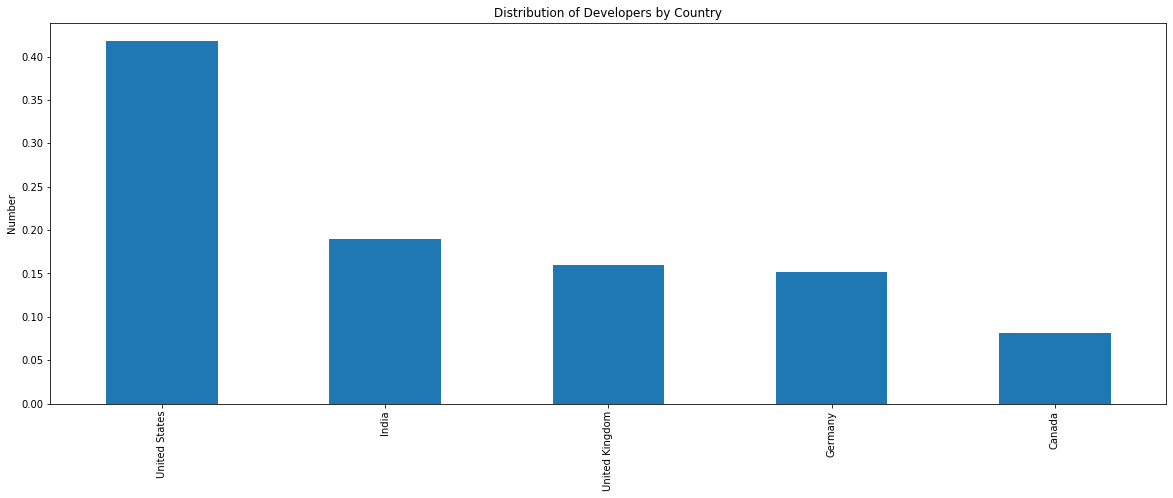

In [233]:
country_proportion = pd.value_counts(selected_countries_df['Country'].values, sort=True)/len(selected_countries_df)

plt.figure(figsize = (20, 7))
country_proportion.plot(kind='bar', title='Distribution of Developers by Country')
plt.ylabel('Number')
plt.show()

#### 2. What's the remote work culture like in the selected countries? 

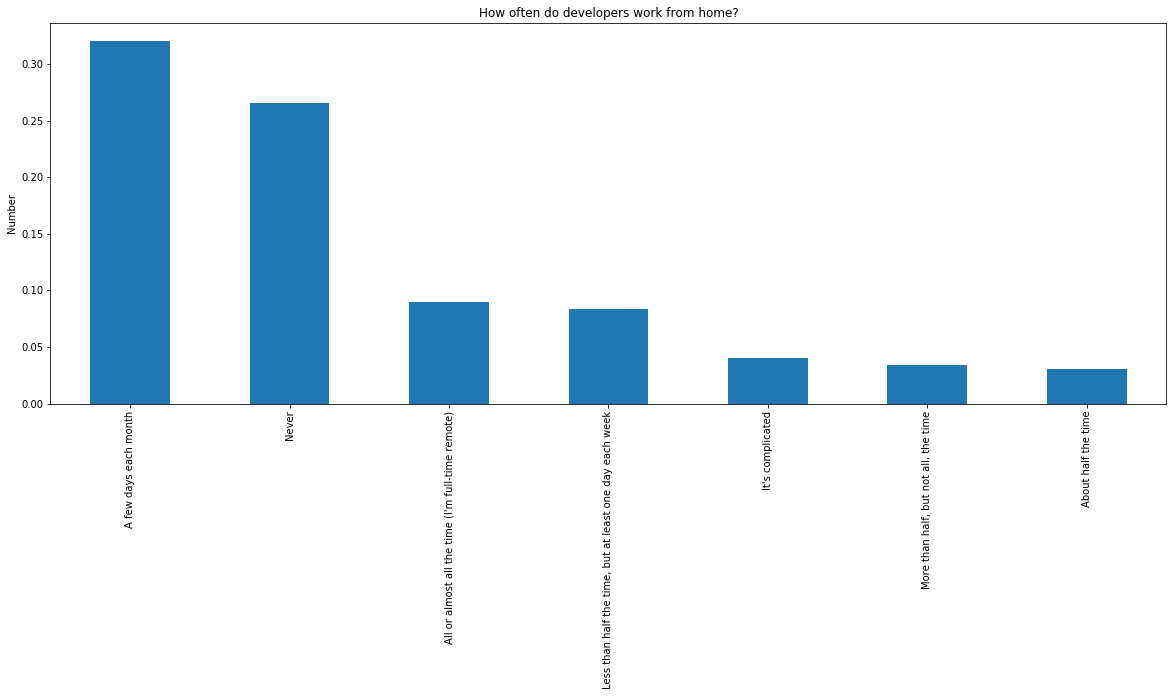

In [218]:
remote_culture_proportion = pd.value_counts(selected_countries_df['HomeRemote'].values, sort=True)/len(selected_countries_df)

plt.figure(figsize = (20, 7))
remote_culture_proportion.plot(kind='bar', title='How often do developers work from home?')
plt.ylabel('Number')
plt.show()

In [214]:
home_remote_df = groupByCountry('HomeRemote')
home_remote_df

Country,Canada,Germany,India,United Kingdom,United States
HomeRemote,,,,,
A few days each month,0.344,0.312,0.271,0.316,0.342
About half the time,0.027,0.030,0.038,0.023,0.031
All or almost all the time (I'm full-time remote),0.088,0.054,0.079,0.078,0.112
It's complicated,0.045,0.033,0.019,0.050,0.048
"Less than half the time, but at least one day each week",0.067,0.077,0.074,0.075,0.096
"More than half, but not all, the time",0.030,0.029,0.055,0.024,0.030
Never,0.258,0.347,0.272,0.317,0.215


<Figure size 1440x720 with 0 Axes>

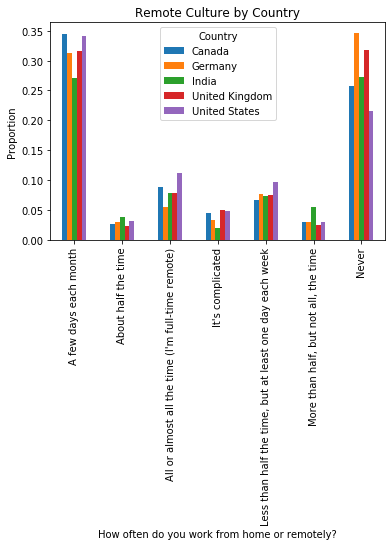

In [226]:
plt.figure(figsize = (20, 10))

home_remote_df.plot(kind='bar')

plt.title('Remote Culture by Country')
plt.xlabel('How often do you work from home or remotely?')
plt.ylabel('Proportion')
plt.legend(title='Country')
plt.show()

### Findings
#### We see that most respondents rarely work at home. Remote work culture still has a lot of room to grow. 
#### More than half of the respondents never worked from home or only worked for a few days a month
#### It was highest in Germany and lowest in India
#### Over one-third of developers worked from home at least a few days a month and almost a third never worked from home

#### 3. What percentage of developers program as a hobby by country? 

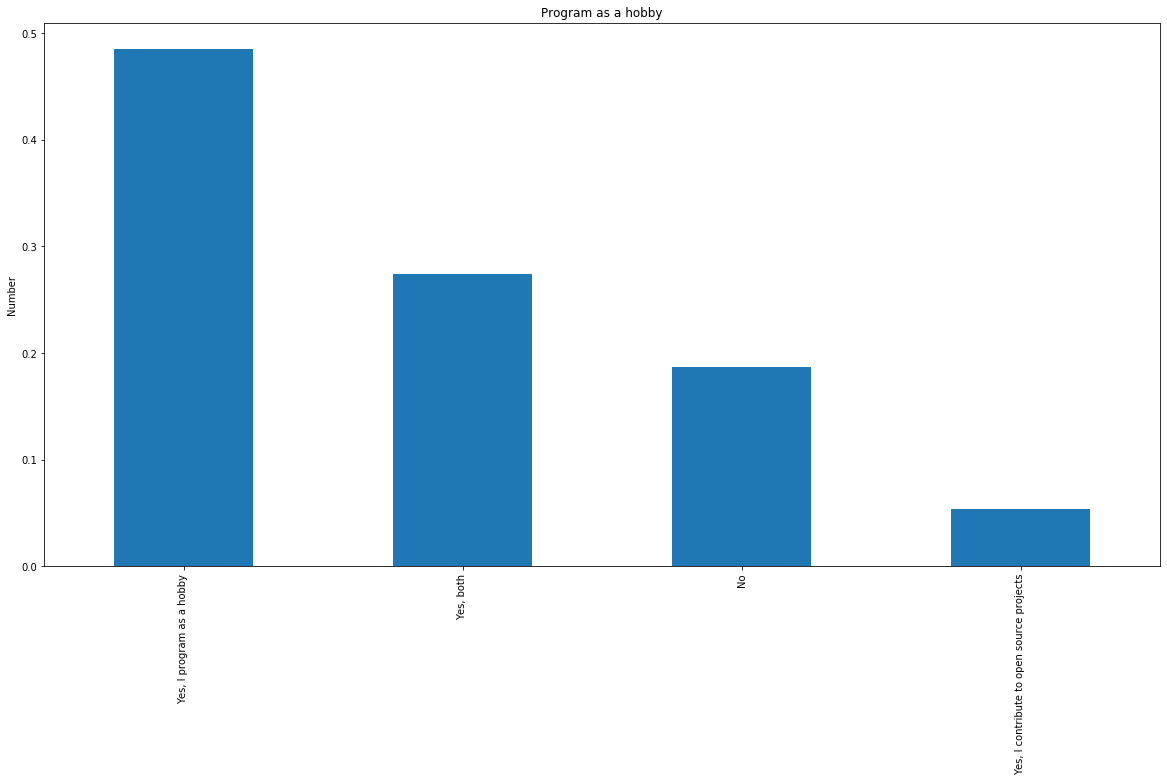

In [224]:
program_hobby = pd.value_counts(selected_countries_df['ProgramHobby'].values, sort=True)/len(selected_countries_df)

plt.figure(figsize = (20, 10))

program_hobby.plot(kind='bar', title='Program as a hobby')
plt.ylabel('Number')
plt.show()

#### We see that about 75% of developers code as a hobby and about 6% contribute to open source. 

In [165]:
program_hobby_df = groupByCountry('ProgramHobby')
program_hobby_df

Country,Canada,Germany,India,United Kingdom,United States
ProgramHobby,,,,,
No,0.203,0.168,0.191,0.195,0.185
"Yes, I contribute to open source projects",0.039,0.061,0.085,0.042,0.044
"Yes, I program as a hobby",0.525,0.500,0.401,0.542,0.489
"Yes, both",0.233,0.270,0.323,0.221,0.282


#### Notice that developers in India are twice as likely to contribute to open-source projects as developers in United Kingdom and Canada
#### However, India has the lowest values for those who code as a hobby. 

<Figure size 1440x720 with 0 Axes>

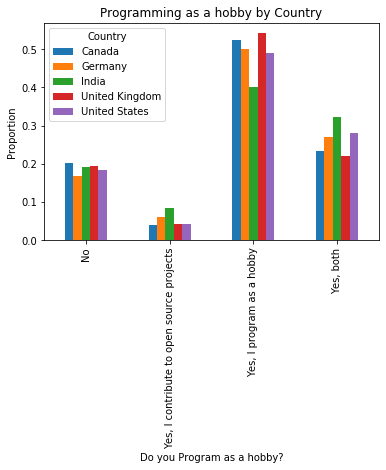

In [234]:
plt.figure(figsize = (20, 10))

program_hobby_df.plot(kind='bar')

plt.title('Programming as a hobby by Country')
plt.xlabel('Do you Program as a hobby?')
plt.ylabel('Proportion')
plt.legend(title='Country')

#### 4. What is the gender distribution by country? 

In [167]:
gender = len(set(selected_countries_df.Gender))
gender

26

#### Due to the large number of gender types, we will focus on just the top 4

In [168]:
gender = pd.value_counts(selected_countries_df['Gender'].values, sort=True)
gender


Male                                                       17009
Female                                                      1601
Gender non-conforming                                        100
Other                                                         95
Male; Other                                                   80
Female; Transgender                                           44
Transgender                                                   35
Male; Gender non-conforming                                   31
Female; Gender non-conforming                                 23
Male; Transgender                                              9
Transgender; Gender non-conforming                             9
Female; Transgender; Gender non-conforming                     8
Male; Female                                                   6
Male; Female; Transgender; Gender non-conforming; Other        4
Gender non-conforming; Other                                   3
Male; Female; Transgender

#### Top 4 genders are 'Male', 'Female', 'Other', 'Gender non-conforming'

In [175]:
top_gender_types_df = selected_countries_df[selected_countries_df['Gender'].map(
        lambda x : x in ('Male','Female', 'Other', 'Gender non-conforming'))]
top_gender_values = pd.value_counts(top_gender_types_df['Gender'].values, sort=True)
top_gender_values

Male                     17009
Female                    1601
Gender non-conforming      100
Other                       95
dtype: int64

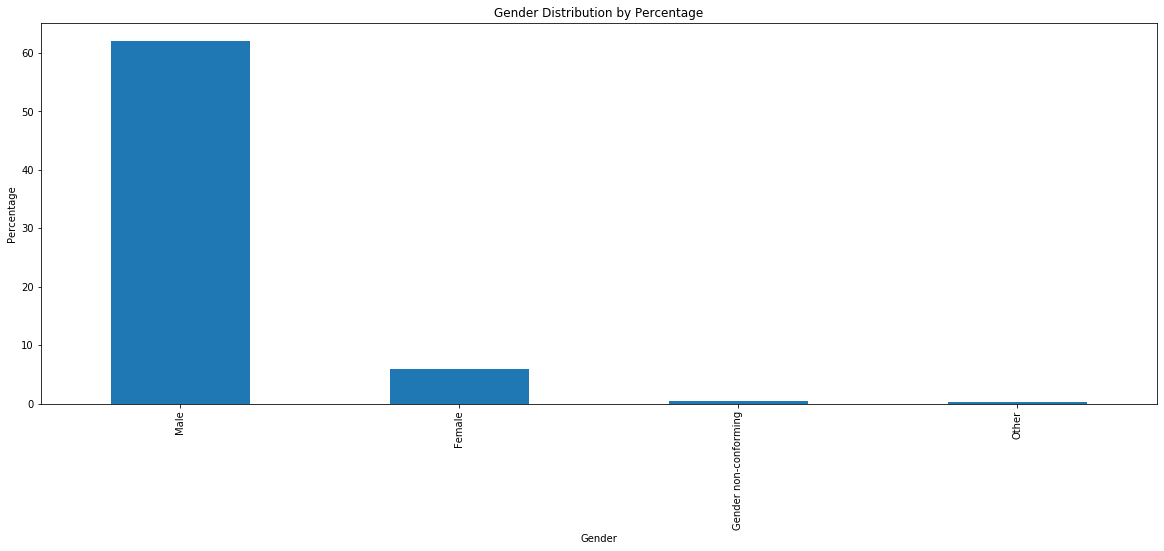

In [217]:
top_gender_values = pd.value_counts(top_gender_types_df['Gender'].values, sort=True)/len(selected_countries_df)*100

plt.figure(figsize = (20, 7))
top_gender_values.plot(kind='bar', title='Gender Distribution by Percentage')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


#### We notice that there are 4 times more Males than Females in the industry. 
#### It's quite clear that females are quite underrepresented. 
#### Let's see if the difference varies by country

In [177]:
top_gender_values_by_country = groupByCountry('Gender', top_gender_types_df)
top_gender_values_by_country



Country,Canada,Germany,India,United Kingdom,United States
Gender,,,,,
Female,0.067,0.037,0.044,0.050,0.074
Gender non-conforming,0.004,0.004,0.001,0.004,0.005
Male,0.648,0.661,0.466,0.672,0.650
Other,0.003,0.005,0.001,0.003,0.004


<Figure size 1440x720 with 0 Axes>

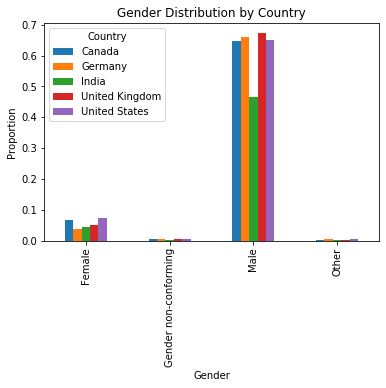

In [229]:
plt.figure(figsize = (20, 10))

top_gender_values_by_country.plot(kind='bar')

plt.title('Gender Distribution by Country')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Country')


#### We see that in 4 of the top 5 countries, about 65% of developers are Male. 
#### This percentage is quite lower in India at about 46%
#### United states has twice more Female developers than Germany

#### 5. What kind of formal education do developers tend to have? 

In [235]:
education = pd.value_counts(selected_countries_df['FormalEducation'].values, sort=True)/len(selected_countries_df)
education

Bachelor's degree                                                    0.462531
Master's degree                                                      0.195675
Some college/university study without earning a bachelor's degree    0.160814
Secondary school                                                     0.104657
Doctoral degree                                                      0.026219
I prefer not to answer                                               0.019072
Primary/elementary school                                            0.018598
Professional degree                                                  0.006564
I never completed any formal education                               0.005871
dtype: float64

#### We notice that almost half of developer's earn a bachelor's degree and about 20% have earned a Master's degree

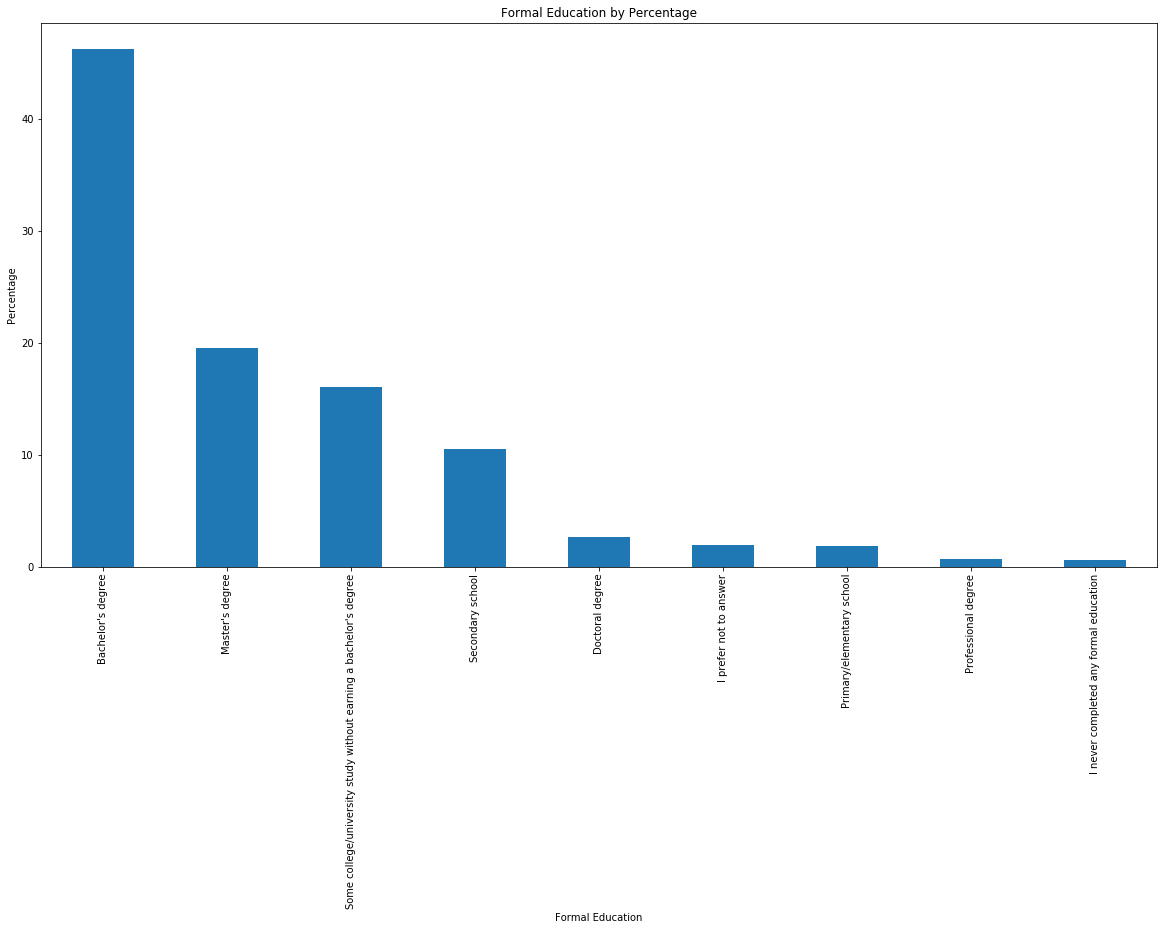

In [230]:
plt.figure(figsize = (20, 10))

formal_education = pd.value_counts(selected_countries_df['FormalEducation'].values, sort=True)/len(selected_countries_df)*100

formal_education.plot(kind='bar', title='Formal Education by Percentage')
plt.xlabel('Formal Education')
plt.ylabel('Percentage')
plt.show()

In [206]:
formal_education_values_by_country = groupByCountry('FormalEducation')
formal_education_values_by_country



Country,Canada,Germany,India,United Kingdom,United States
FormalEducation,,,,,
Bachelor's degree,0.452,0.230,0.613,0.425,0.495
Doctoral degree,0.017,0.037,0.003,0.041,0.029
I never completed any formal education,0.006,0.005,0.009,0.007,0.004
I prefer not to answer,0.020,0.026,0.024,0.013,0.016
Master's degree,0.107,0.304,0.212,0.195,0.167
Primary/elementary school,0.025,0.010,0.009,0.016,0.026
Professional degree,0.008,0.008,0.010,0.006,0.004
Secondary school,0.099,0.234,0.076,0.118,0.067
Some college/university study without earning a bachelor's degree,0.266,0.146,0.044,0.178,0.192


<Figure size 1440x720 with 0 Axes>

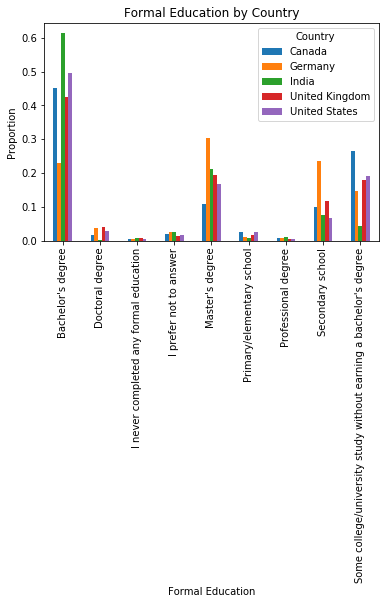

In [231]:
plt.figure(figsize = (20, 10))

formal_education_values_by_country.plot(kind='bar')
plt.title('Formal Education by Country')
plt.xlabel('Formal Education')
plt.ylabel('Proportion')
plt.legend(title='Country')

## We see 

#### Notice that developers tend to earn different degrees in different countries. In India, over 60% earn a Bachelor's degree while only 23% in Germany (less than half of India's percentage)
#### Developers in India rarely earn Doctoral Degree (0.3%) compared to Germany and United States with over 10 times that amount
#### 3 times more people earned Master's degree in Germany than Canada
#### The top types of formal education in Canada was Bachelor's Degree, Some College/University and Master's degree
#### The top types of formal education in Germany was Master's degree, Secondary School, and  Bachelor's Degree
#### The top types of formal education in India was Bachelor's Degree, and Master's degree
#### The top types of formal education in United Kingdom was Bachelor's Degree, Master's degree and Some College/University
#### The top types of formal education in United States was Bachelor's Degree, Some College/University and Master's degree